In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools

In [2]:
# Initialize some dictionary that will later be used
signal_df = {} # yield
signal_match_df = {} # gen matched vtx

signal_reco_df = {} # yield only counting the events where gen ee are reconstructed
signal_match_reco_df = {} # gen matched vtx, out of the events where gen ee are reconstructed

for delta in ['0p1','0p2']:
    signal_df[delta] = {}
    signal_match_df[delta] = {}
    signal_reco_df[delta] = {}
    signal_match_reco_df[delta] = {}

In [94]:
def plot_counts_signal_varying_M1(df_sig, dict_eff, cuts, cutNames, delta, ct, ylabel='Events', doLegend=True, doLog=True, doSave=False, outDir = 'plots/cutflow/', outName='efficiency.png'):
    m1s = sorted(list(set(df_sig[(df_sig.delta==delta)&(df_sig.ctau==ct)].m1)))
        
    for m1 in m1s:
        pt = df_sig[(df_sig.delta==delta) & (df_sig.m1==m1) & (df_sig.ctau==ct)].name[0]
        effs = [dict_eff[pt][cut] for cut in cuts]
        plt.plot(np.arange(len(cuts)), effs, label=r"$M_1 = {0}$ GeV".format(m1), color=f"C{m1s.index(m1)}")

    if doLog:
        plt.yscale('log')

    plt.ylabel(ylabel)
    
    labels = [cutNames[c] for c in cuts]
    # Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
    cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
    cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))
    cut = list(map(lambda x: x.replace('BDT v2 Loose WP', 'BDT Score'), cut))
    
    plt.xticks(ticks = np.arange(len(cuts)), labels = cut, rotation = 45, ha = 'right')

    plt.grid()

    plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))
    
    if doLegend:
        plt.legend()
    
    if doSave:
        if not os.path.isdir(outDir):
            os.makedirs(outDir)
        plt.savefig(f'{outDir}/{outName}')
        print(f'Saved: {outDir}/{outName}')

In [3]:
def plot_efficiency_signal_varying_M1(df_sig, dict_eff, cuts, cutNames, delta, ct, ylim = [1e-5,5e-2], ylabel='Efficiency', doLegend=True, doLog=True, doSave=False, outDir = 'plots/cutflow/', outName='efficiency.png'):
    m1s = sorted(list(set(df_sig[(df_sig.delta==delta)&(df_sig.ctau==ct)].m1)))
        
    for m1 in m1s:
        pt = df_sig[(df_sig.delta==delta) & (df_sig.m1==m1) & (df_sig.ctau==ct)].name[0]
        effs = [dict_eff[pt][cut] for cut in cuts]
        plt.plot(np.arange(len(cuts)), effs, label=r"$M_1 = {0}$ GeV".format(m1), color=f"C{m1s.index(m1)}")

    if doLog:
        plt.yscale('log')

    plt.ylabel(ylabel)
    
    labels = [cutNames[c] for c in cuts]
    # Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
    cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
    cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))
    cut = list(map(lambda x: x.replace('BDT v2 Loose WP', 'BDT Score'), cut))
    
    plt.xticks(ticks = np.arange(len(cuts)), labels = cut, rotation = 45, ha = 'right')

    plt.grid()

    plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))

    plt.ylim(ylim)
    
    if doLegend:
        plt.legend()
    
    if doSave:
        if not os.path.isdir(outDir):
            os.makedirs(outDir)
        plt.savefig(f'{outDir}/{outName}')
        print(f'Saved: {outDir}/{outName}')

In [4]:
def plot_counts_signal_varying_M1(df_sig, dict_eff, cuts, cutNames, delta, ct, ylabel='Events', doLegend=True, doLog=True, doSave=False, outDir = 'plots/cutflow/', outName='efficiency.png'):
    m1s = sorted(list(set(df_sig[(df_sig.delta==delta)&(df_sig.ctau==ct)].m1)))
        
    for m1 in m1s:
        pt = df_sig[(df_sig.delta==delta) & (df_sig.m1==m1) & (df_sig.ctau==ct)].name[0]
        effs = [dict_eff[pt][cut] for cut in cuts]
        plt.plot(np.arange(len(cuts)), effs, label=r"$M_1 = {0}$ GeV".format(m1), color=f"C{m1s.index(m1)}")

    if doLog:
        plt.yscale('log')

    plt.ylabel(ylabel)
    
    labels = [cutNames[c] for c in cuts]
    # Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
    cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
    cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))
    cut = list(map(lambda x: x.replace('BDT v2 Loose WP', 'BDT Score'), cut))
    
    plt.xticks(ticks = np.arange(len(cuts)), labels = cut, rotation = 45, ha = 'right')

    plt.grid()

    plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))

    if doLegend:
        plt.legend()
    
    if doSave:
        if not os.path.isdir(outDir):
            os.makedirs(outDir)
        plt.savefig(f'{outDir}/{outName}')
        print(f'Saved: {outDir}/{outName}')

### Import coffea files -- signal and background

In [5]:
prefix = './coffea/skimmed/'
suffix = '_SR_v3_skimmed'

In [6]:
# Signal
f_sig = "signal"
sig_histo = util.load(f'{prefix}/{f_sig}{suffix}.coffea')[0]

In [7]:
# Background
bkg_files = {
    "QCD": "bkg_2018_QCD_TuneCP5_PSWeights", # No entry for QCD
    "Top": "bkg_2018_Top",
    "DY": "bkg_2018_DY",
    "Diboson": "bkg_2018_Diboson",
    "Triboson": "bkg_2018_Triboson",
    "W+jets": "bkg_2018_WJets",
    "Z+jets": "bkg_2018_ZJets",
}

bkg_histos = {}
histograms = []

for b in bkg_files.keys():
    bkg_histos[b] = util.load(f'{prefix}/{bkg_files[b]}{suffix}.coffea')[0]
    histograms = list(bkg_histos[b].keys())

### Cutflow Dataframe -- signal

In [8]:
sig_samples = list(sig_histo['cutflow'].keys()) # names of signal sub-process, i.e. mass point, lifetime etc.
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

In [9]:
# signal efficiencies by delta/ctau
cf_s = sig_histo['cutflow']              # efficiency
ct_s = sig_histo['cutflow_cts']          # xsec-weighted event count
fr_s = sig_histo['cutflow_vtx_matched'] # fraction that selected vtx is truth-matched, for signal
desc = sig_histo['cutDesc']

In [10]:
# signal efficiencies, when only looking at the events where the gen ee are reconstructed (dR(gen,reco) < 0.1)
cf_s_reco = sig_histo['cutflow_genEEreconstructed']              # efficiency
ct_s_reco = sig_histo['cutflow_cts_genEEreconstructed']          # xsec-weighted event count
fr_s_reco = sig_histo['cutflow_vtx_matched_genEEreconstructed']  # fraction that selected vtx is truth-matched, for signal

In [11]:
cuts = list(sig_histo['cutflow'][sig_samples[0]].keys())
cutNames = {cname:ptools.getCut(sig_histo['cutDesc'][cname]) for cname in sig_histo['cutDesc'].keys()}

cuts

['all',
 'hasVtx',
 'cut5',
 'cut6',
 'cut7',
 'cut8',
 'cut9',
 'cut11',
 'cut12',
 'cut13',
 'cut14',
 'cut15']

In [12]:
deltas = sorted(list(set(si.delta)))

### For signal events

In [13]:
sig_columns = list(cf_s.keys())
sig_efficiency = {c: [ cf_s[samp][c] for samp in sig_columns ] for c in cuts}
sig_match = {c: [ fr_s[samp][c] for samp in sig_columns ] for c in cuts}

In [14]:
sig_eff_df = pd.DataFrame.from_dict(sig_efficiency).transpose()
sig_eff_df.columns = sig_columns

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))

sig_eff_df.index = cut

In [15]:
sig_eff_df

,sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,...,sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,sig_2018_Mchi-10p5_dMchi-1p0_ctau-10
Preselections,0.007414,0.010930,0.014484,0.007306,0.014782,0.010676,0.031125,0.022439,0.033826,0.022522,...,0.015838,0.016286,0.018942,0.010649,0.007977,0.012593,0.014729,0.015928,0.008039,0.012434
0 < n(jet) < 3 & n(good vertex) > 0,0.000647,0.001187,0.001842,0.000596,0.002143,0.001022,0.005252,0.002420,0.006982,0.002231,...,0.001936,0.001989,0.002826,0.000928,0.000601,0.001410,0.002188,0.002349,0.000647,0.001380
No b-tagged jets,0.000562,0.000987,0.001519,0.000504,0.001894,0.000847,0.004562,0.002063,0.005961,0.001905,...,0.001685,0.001734,0.002381,0.000818,0.000507,0.001150,0.001889,0.002024,0.000545,0.001180
Leading jet |eta| < 2.4,0.000528,0.000935,0.001421,0.000475,0.001811,0.000792,0.004329,0.001980,0.005695,0.001847,...,0.001584,0.001669,0.002275,0.000775,0.000483,0.001083,0.001805,0.001882,0.000515,0.001116
Leading jet pT > 80 GeV,0.000528,0.000931,0.001418,0.000475,0.001811,0.000792,0.004329,0.001980,0.005695,0.001847,...,0.001584,0.001669,0.002273,0.000775,0.000483,0.001083,0.001805,0.001880,0.000515,0.001116
"dPhi(MET,leading jet) > 1.5",0.000528,0.000931,0.001418,0.000475,0.001811,0.000792,0.004329,0.001980,0.005695,0.001847,...,0.001584,0.001669,0.002273,0.000775,0.000483,0.001083,0.001805,0.001880,0.000515,0.001116
"dPhi(MET,all jets) > 0.75",0.000501,0.000876,0.001404,0.000457,0.001794,0.000771,0.004260,0.001893,0.005651,0.001804,...,0.001549,0.001649,0.002253,0.000749,0.000467,0.001046,0.001794,0.001867,0.000504,0.001085
Vertex chi2/df < 3,0.000140,0.000373,0.000731,0.000121,0.000860,0.000318,0.002492,0.000728,0.003516,0.000639,...,0.000792,0.000730,0.001158,0.000227,0.000169,0.000474,0.000944,0.000923,0.000163,0.000490
"dPhi(MET,vtx) < 1",0.000099,0.000342,0.000714,0.000075,0.000814,0.000275,0.002233,0.000568,0.003294,0.000505,...,0.000750,0.000662,0.001101,0.000170,0.000124,0.000429,0.000874,0.000865,0.000105,0.000438
m(ee) < 20,0.000089,0.000318,0.000694,0.000074,0.000798,0.000271,0.002207,0.000562,0.003294,0.000494,...,0.000738,0.000657,0.001095,0.000166,0.000116,0.000424,0.000861,0.000854,0.000103,0.000432


In [16]:
sig_counts = {c: [ ct_s[samp][c] for samp in sig_columns ] for c in cuts}

In [17]:
sig_cts_df = pd.DataFrame.from_dict(sig_counts).transpose()
sig_cts_df.columns = sig_columns

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))

sig_cts_df.index = cut

In [18]:
sig_cts_df

,sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,...,sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,sig_2018_Mchi-10p5_dMchi-1p0_ctau-10
Preselections,14.287467,211.621136,2748.241352,443.657710,62382.764516,6090.241352,18.964345,1.367489,205.186408,43.757275,...,93.998636,3043.716823,30374.507403,200.845707,7.599038,118.479518,1394.264143,39395.490506,238.687780,3591.894377
0 < n(jet) < 3 & n(good vertex) > 0,1.246745,22.976276,349.572905,36.186419,9045.039685,583.268175,3.200085,0.147453,42.353992,4.335275,...,11.489254,371.803097,4531.002909,17.499996,0.572359,13.269842,207.145122,5811.027344,19.205951,398.724018
No b-tagged jets,1.082620,19.101673,288.308597,30.606686,7993.005413,483.383984,2.779586,0.125749,36.160985,3.701598,...,10.001554,324.157435,3817.775056,15.419565,0.482576,10.814831,178.784314,5006.120331,16.193824,340.802750
Leading jet |eta| < 2.4,1.017052,18.099530,269.621849,28.817702,7642.383575,451.729326,2.637744,0.120663,34.547900,3.588904,...,9.400079,312.003112,3648.137891,14.610412,0.460453,10.192790,170.888834,4654.252295,15.286139,322.406777
Leading jet pT > 80 GeV,1.017052,18.033157,268.976334,28.817702,7642.383575,451.729326,2.637744,0.120663,34.547900,3.588904,...,9.400079,312.003112,3644.603971,14.610412,0.460453,10.192790,170.888834,4648.894588,15.286139,322.406777
"dPhi(MET,leading jet) > 1.5",1.017052,18.033157,268.976334,28.817702,7642.383575,451.729326,2.637744,0.120663,34.547900,3.588904,...,9.400079,312.003112,3644.603971,14.610412,0.460453,10.192790,170.888834,4648.894588,15.286139,322.406777
"dPhi(MET,all jets) > 0.75",0.964478,16.965408,266.400081,27.734501,7572.305104,439.550936,2.595839,0.115385,34.276942,3.504454,...,9.195837,308.264550,3612.884287,14.120705,0.444844,9.839573,169.824212,4616.983394,14.977307,313.433122
Vertex chi2/df < 3,0.269010,7.215959,138.707294,7.328940,3628.614587,181.403615,1.518439,0.044393,21.328088,1.242435,...,4.699745,136.373210,1857.555855,4.290508,0.161307,4.457316,89.393250,2282.238493,4.843999,141.449693
"dPhi(MET,vtx) < 1",0.190284,6.614971,135.484682,4.581357,3435.919097,157.051873,1.360706,0.034614,19.979024,0.980425,...,4.450107,123.782482,1765.703988,3.210851,0.118416,4.036881,82.781791,2138.371065,3.106716,126.634596
m(ee) < 20,0.170591,6.147642,131.614639,4.498104,3365.747178,154.625541,1.344870,0.034223,19.979024,0.960682,...,4.382069,122.850389,1755.101964,3.137422,0.110610,3.986224,81.500679,2111.683684,3.048808,124.835237


In [19]:
sig_cts_df['sig_2018_Mchi-5p25_dMchi-0p5_ctau-1']

Preselections                          62382.764516
0 < n(jet) < 3 & n(good vertex) > 0     9045.039685
No b-tagged jets                        7993.005413
Leading jet |eta| < 2.4                 7642.383575
Leading jet pT > 80 GeV                 7642.383575
dPhi(MET,leading jet) > 1.5             7642.383575
dPhi(MET,all jets) > 0.75               7572.305104
Vertex chi2/df < 3                      3628.614587
dPhi(MET,vtx) < 1                       3435.919097
m(ee) < 20                              3365.747178
dR(ee) < 1.0                            2997.901248
minDxy > 0.01                           1560.499063
Name: sig_2018_Mchi-5p25_dMchi-0p5_ctau-1, dtype: float64

In [20]:
sig_match_df = pd.DataFrame.from_dict(sig_match).transpose()
sig_match_df.columns = sig_columns

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))

sig_match_df.index = cut

In [21]:
sig_match_df.transpose()

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vertex chi2/df < 3,"dPhi(MET,vtx) < 1",m(ee) < 20,dR(ee) < 1.0,minDxy > 0.01
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,1.0,0.094778,0.103057,0.103253,0.103253,0.103253,0.102060,0.317173,0.448397,0.500159,0.765341,0.786393
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,1.0,0.296610,0.314809,0.306420,0.307548,0.307548,0.322959,0.657576,0.717319,0.771848,0.898784,0.909093
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,1.0,0.500157,0.516939,0.526463,0.527727,0.527727,0.530413,0.865238,0.885818,0.911865,0.968763,0.975020
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,1.0,0.082836,0.082989,0.083810,0.083810,0.083810,0.084089,0.284096,0.454477,0.462889,0.781266,0.869651
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,1.0,0.422538,0.434271,0.438133,0.438133,0.438133,0.439877,0.806834,0.852084,0.869849,0.976580,0.966251
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,1.0,0.265125,0.284620,0.288401,0.288401,0.288401,0.290839,0.644316,0.744220,0.755898,0.914228,0.901141
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,1.0,0.537021,0.548269,0.549837,0.549837,0.549837,0.558713,0.858079,0.895718,0.906265,0.959817,0.975580
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,1.0,0.281222,0.292453,0.298292,0.298292,0.298292,0.311935,0.696134,0.796653,0.805757,0.942089,0.946347
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,1.0,0.599086,0.612185,0.625180,0.625180,0.625180,0.630122,0.886122,0.918922,0.918922,0.952315,0.942741
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,1.0,0.242447,0.251210,0.248896,0.248896,0.248896,0.252486,0.630534,0.755899,0.771434,0.892935,0.916053


### For signal events having gen ee reconstructed (having reco e with dR < 0.1)

In [22]:
sig_columns_reco = list(cf_s_reco.keys())
sig_efficiency_reco = {c: [ cf_s_reco[samp][c] for samp in sig_columns_reco ] for c in cuts}
sig_match_reco = {c: [ fr_s_reco[samp][c] for samp in sig_columns_reco ] for c in cuts}

In [23]:
sig_eff_reco_df = pd.DataFrame.from_dict(sig_efficiency_reco).transpose()
sig_eff_reco_df.columns = sig_columns_reco

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))

sig_eff_reco_df.index = cut

In [24]:
sig_eff_reco_df

,sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,...,sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,sig_2018_Mchi-10p5_dMchi-1p0_ctau-10
Preselections,0.000429,0.002953,0.007196,0.000304,0.005871,0.002087,0.013324,0.004794,0.018895,0.003601,...,0.005956,0.004959,0.008445,0.001148,0.000807,0.004207,0.007452,0.006861,0.000555,0.003264
0 < n(jet) < 3 & n(good vertex) > 0,0.000089,0.000521,0.001282,0.000076,0.001300,0.000420,0.003597,0.000979,0.005339,0.000744,...,0.001176,0.001032,0.001892,0.000200,0.000137,0.000765,0.001548,0.001535,0.000111,0.000693
No b-tagged jets,0.000075,0.000445,0.001078,0.000066,0.001159,0.000369,0.003148,0.000854,0.004673,0.000640,...,0.001025,0.000887,0.001590,0.000177,0.000117,0.000627,0.001346,0.001296,0.000096,0.000589
Leading jet |eta| < 2.4,0.000071,0.000421,0.001027,0.000062,0.001121,0.000350,0.003001,0.000828,0.004540,0.000619,...,0.000979,0.000850,0.001544,0.000172,0.000116,0.000597,0.001282,0.001212,0.000089,0.000564
Leading jet pT > 80 GeV,0.000071,0.000421,0.001027,0.000062,0.001121,0.000350,0.003001,0.000828,0.004540,0.000619,...,0.000979,0.000850,0.001542,0.000172,0.000116,0.000597,0.001282,0.001212,0.000089,0.000564
"dPhi(MET,leading jet) > 1.5",0.000071,0.000421,0.001027,0.000062,0.001121,0.000350,0.003001,0.000828,0.004540,0.000619,...,0.000979,0.000850,0.001542,0.000172,0.000116,0.000597,0.001282,0.001212,0.000089,0.000564
"dPhi(MET,all jets) > 0.75",0.000068,0.000404,0.001020,0.000060,0.001113,0.000339,0.002958,0.000819,0.004495,0.000608,...,0.000960,0.000842,0.001533,0.000170,0.000115,0.000590,0.001276,0.001203,0.000089,0.000552
Vertex chi2/df < 3,0.000044,0.000283,0.000677,0.000042,0.000756,0.000237,0.002233,0.000546,0.003294,0.000435,...,0.000694,0.000587,0.001048,0.000110,0.000071,0.000388,0.000868,0.000804,0.000059,0.000389
"dPhi(MET,vtx) < 1",0.000044,0.000280,0.000673,0.000041,0.000748,0.000237,0.002069,0.000478,0.003205,0.000405,...,0.000683,0.000582,0.001039,0.000105,0.000071,0.000384,0.000845,0.000796,0.000059,0.000386
m(ee) < 20,0.000044,0.000273,0.000663,0.000040,0.000731,0.000235,0.002061,0.000475,0.003205,0.000405,...,0.000681,0.000580,0.001033,0.000104,0.000070,0.000383,0.000841,0.000787,0.000059,0.000381


In [25]:
sig_counts_reco = {c: [ ct_s_reco[samp][c] for samp in sig_columns_reco ] for c in cuts}

In [26]:
sig_cts_reco_df = pd.DataFrame.from_dict(sig_counts_reco).transpose()
sig_cts_reco_df.columns = sig_columns_reco

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))

sig_cts_reco_df.index = cut

In [27]:
sig_cts_reco_df

,sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,...,sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,sig_2018_Mchi-10p5_dMchi-1p0_ctau-10
Preselections,0.827147,57.180228,1365.476804,18.447519,24776.055248,1190.665743,8.118168,0.292147,114.614464,6.996573,...,35.351179,926.846150,13541.063436,21.643236,0.768680,39.578707,705.454724,16968.666968,16.484894,942.926858
0 < n(jet) < 3 & n(good vertex) > 0,0.170568,10.088073,243.181188,4.621960,5486.757891,239.882501,2.191445,0.059656,32.386537,1.445372,...,6.982371,192.901624,3033.485521,3.775849,0.130093,7.198891,146.561050,3796.110522,3.281567,200.260840
No b-tagged jets,0.144298,8.618702,204.476061,3.997833,4890.702896,210.620371,1.918127,0.052033,28.346091,1.242540,...,6.085103,165.806615,2549.684920,3.335222,0.111867,5.903361,127.369315,3204.558647,2.837542,170.168770
Leading jet |eta| < 2.4,0.137740,8.151389,194.806789,3.789926,4732.804149,199.669941,1.828723,0.050466,27.537828,1.203100,...,5.812612,158.798775,2475.493613,3.237193,0.110572,5.617535,121.396524,2996.709036,2.644603,162.991234
Leading jet pT > 80 GeV,0.137740,8.151389,194.806789,3.789926,4732.804149,199.669941,1.828723,0.050466,27.537828,1.203100,...,5.812612,158.798775,2471.959428,3.237193,0.110572,5.617535,121.396524,2996.709036,2.644603,162.991234
"dPhi(MET,leading jet) > 1.5",0.137740,8.151389,194.806789,3.789926,4732.804149,199.669941,1.828723,0.050466,27.537828,1.203100,...,5.812612,158.798775,2471.959428,3.237193,0.110572,5.617535,121.396524,2996.709036,2.644603,162.991234
"dPhi(MET,all jets) > 0.75",0.131161,7.816946,193.518798,3.665276,4697.843379,193.575064,1.802543,0.049881,27.266874,1.180574,...,5.699044,157.395984,2457.881697,3.212631,0.109275,5.550187,120.757685,2975.416989,2.644603,159.398524
Vertex chi2/df < 3,0.085323,5.479863,128.386802,2.540739,3190.673429,135.131256,1.360801,0.033249,19.980975,0.845302,...,4.120892,109.754767,1680.976445,2.084034,0.067657,3.649808,82.138819,1989.037324,1.756509,112.259613
"dPhi(MET,vtx) < 1",0.085323,5.412961,127.743726,2.499145,3155.649768,135.131256,1.260852,0.029138,19.440846,0.786140,...,4.052902,108.819310,1666.836647,1.985624,0.067657,3.616106,80.008202,1967.748087,1.756509,111.361883
m(ee) < 20,0.085323,5.279828,125.812456,2.457501,3085.477848,133.917193,1.255577,0.028942,19.440846,0.786140,...,4.041579,108.355472,1656.234624,1.961191,0.066360,3.599195,79.580694,1946.390803,1.737180,110.011919


In [28]:
sig_cts_reco_df

,sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,...,sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,sig_2018_Mchi-10p5_dMchi-1p0_ctau-10
Preselections,0.827147,57.180228,1365.476804,18.447519,24776.055248,1190.665743,8.118168,0.292147,114.614464,6.996573,...,35.351179,926.846150,13541.063436,21.643236,0.768680,39.578707,705.454724,16968.666968,16.484894,942.926858
0 < n(jet) < 3 & n(good vertex) > 0,0.170568,10.088073,243.181188,4.621960,5486.757891,239.882501,2.191445,0.059656,32.386537,1.445372,...,6.982371,192.901624,3033.485521,3.775849,0.130093,7.198891,146.561050,3796.110522,3.281567,200.260840
No b-tagged jets,0.144298,8.618702,204.476061,3.997833,4890.702896,210.620371,1.918127,0.052033,28.346091,1.242540,...,6.085103,165.806615,2549.684920,3.335222,0.111867,5.903361,127.369315,3204.558647,2.837542,170.168770
Leading jet |eta| < 2.4,0.137740,8.151389,194.806789,3.789926,4732.804149,199.669941,1.828723,0.050466,27.537828,1.203100,...,5.812612,158.798775,2475.493613,3.237193,0.110572,5.617535,121.396524,2996.709036,2.644603,162.991234
Leading jet pT > 80 GeV,0.137740,8.151389,194.806789,3.789926,4732.804149,199.669941,1.828723,0.050466,27.537828,1.203100,...,5.812612,158.798775,2471.959428,3.237193,0.110572,5.617535,121.396524,2996.709036,2.644603,162.991234
"dPhi(MET,leading jet) > 1.5",0.137740,8.151389,194.806789,3.789926,4732.804149,199.669941,1.828723,0.050466,27.537828,1.203100,...,5.812612,158.798775,2471.959428,3.237193,0.110572,5.617535,121.396524,2996.709036,2.644603,162.991234
"dPhi(MET,all jets) > 0.75",0.131161,7.816946,193.518798,3.665276,4697.843379,193.575064,1.802543,0.049881,27.266874,1.180574,...,5.699044,157.395984,2457.881697,3.212631,0.109275,5.550187,120.757685,2975.416989,2.644603,159.398524
Vertex chi2/df < 3,0.085323,5.479863,128.386802,2.540739,3190.673429,135.131256,1.360801,0.033249,19.980975,0.845302,...,4.120892,109.754767,1680.976445,2.084034,0.067657,3.649808,82.138819,1989.037324,1.756509,112.259613
"dPhi(MET,vtx) < 1",0.085323,5.412961,127.743726,2.499145,3155.649768,135.131256,1.260852,0.029138,19.440846,0.786140,...,4.052902,108.819310,1666.836647,1.985624,0.067657,3.616106,80.008202,1967.748087,1.756509,111.361883
m(ee) < 20,0.085323,5.279828,125.812456,2.457501,3085.477848,133.917193,1.255577,0.028942,19.440846,0.786140,...,4.041579,108.355472,1656.234624,1.961191,0.066360,3.599195,79.580694,1946.390803,1.737180,110.011919


In [29]:
sig_match_reco_df = pd.DataFrame.from_dict(sig_match_reco).transpose()
sig_match_reco_df.columns = sig_columns_reco

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))

sig_match_reco_df.index = cut

In [30]:
sig_match_reco_df.transpose()

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vertex chi2/df < 3,"dPhi(MET,vtx) < 1",m(ee) < 20,dR(ee) < 1.0,minDxy > 0.01
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,1.0,0.692768,0.773201,0.762403,0.762403,0.762403,0.750484,1.000000,1.000000,1.000000,1.000000,1.000000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,1.0,0.675550,0.697712,0.680382,0.680382,0.680382,0.700929,0.865906,0.876608,0.898712,0.946687,0.937530
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,1.0,0.718975,0.728877,0.728650,0.728650,0.728650,0.730172,0.934791,0.939496,0.953918,0.984129,0.991546
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,1.0,0.648542,0.635350,0.637269,0.637269,0.637269,0.636290,0.819495,0.833134,0.847252,0.908994,0.930160
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,1.0,0.696563,0.709741,0.707484,0.707484,0.707484,0.709024,0.917578,0.927761,0.948861,0.976580,0.966251
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,1.0,0.644644,0.653216,0.652473,0.652473,0.652473,0.660408,0.864946,0.864946,0.872787,0.950518,0.948061
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,1.0,0.784191,0.794504,0.793083,0.793083,0.793083,0.804601,0.957481,0.966655,0.970717,0.979498,0.981555
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,1.0,0.695102,0.706778,0.713199,0.713199,0.713199,0.721573,0.929455,0.946379,0.952767,0.974329,0.972442
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,1.0,0.783464,0.780961,0.784326,0.784326,0.784326,0.792120,0.945864,0.944360,0.944360,0.967709,0.970517
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,1.0,0.727200,0.748368,0.742469,0.742469,0.742469,0.749489,0.926767,0.942710,0.942710,0.957851,0.958158


In [31]:
sig_match_df.transpose()

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vertex chi2/df < 3,"dPhi(MET,vtx) < 1",m(ee) < 20,dR(ee) < 1.0,minDxy > 0.01
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,1.0,0.094778,0.103057,0.103253,0.103253,0.103253,0.102060,0.317173,0.448397,0.500159,0.765341,0.786393
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,1.0,0.296610,0.314809,0.306420,0.307548,0.307548,0.322959,0.657576,0.717319,0.771848,0.898784,0.909093
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,1.0,0.500157,0.516939,0.526463,0.527727,0.527727,0.530413,0.865238,0.885818,0.911865,0.968763,0.975020
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,1.0,0.082836,0.082989,0.083810,0.083810,0.083810,0.084089,0.284096,0.454477,0.462889,0.781266,0.869651
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,1.0,0.422538,0.434271,0.438133,0.438133,0.438133,0.439877,0.806834,0.852084,0.869849,0.976580,0.966251
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,1.0,0.265125,0.284620,0.288401,0.288401,0.288401,0.290839,0.644316,0.744220,0.755898,0.914228,0.901141
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,1.0,0.537021,0.548269,0.549837,0.549837,0.549837,0.558713,0.858079,0.895718,0.906265,0.959817,0.975580
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,1.0,0.281222,0.292453,0.298292,0.298292,0.298292,0.311935,0.696134,0.796653,0.805757,0.942089,0.946347
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,1.0,0.599086,0.612185,0.625180,0.625180,0.625180,0.630122,0.886122,0.918922,0.918922,0.952315,0.942741
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,1.0,0.242447,0.251210,0.248896,0.248896,0.248896,0.252486,0.630534,0.755899,0.771434,0.892935,0.916053


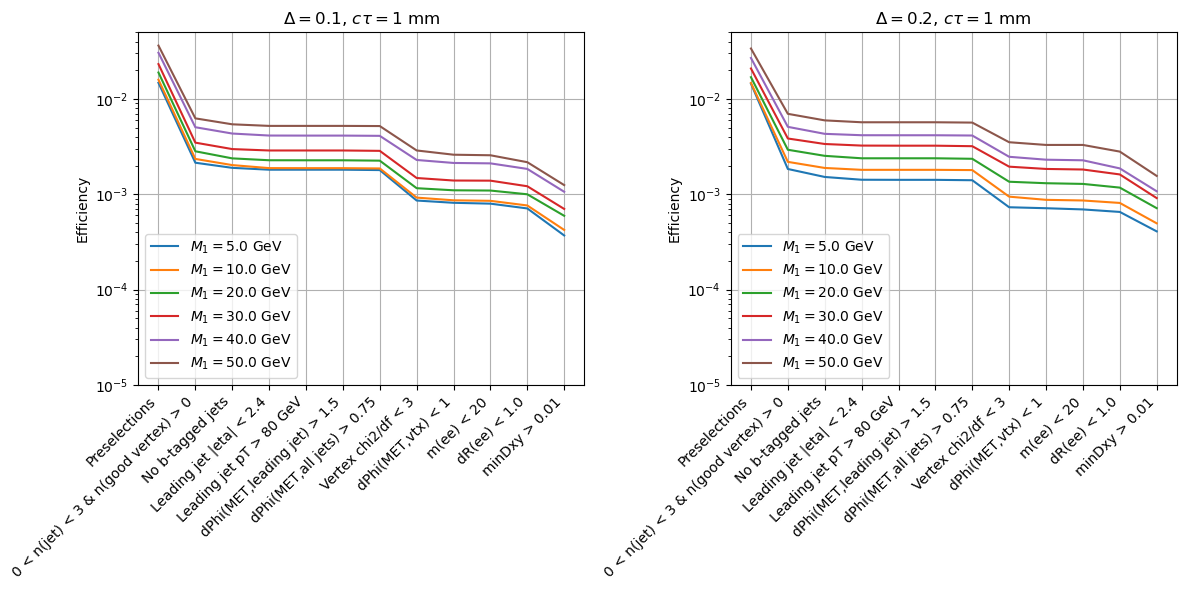

In [32]:
deltas = [0.1,0.2]

ct = 1

fig,axes = plt.subplots(1,len(deltas),figsize=(6*len(deltas),6))

for i, delta in enumerate(deltas):
    plt.sca(axes[i])
    plot_efficiency_signal_varying_M1( df_sig = si, dict_eff = cf_s, cuts = cuts, cutNames = cutNames, 
                                       delta = delta, ct = ct)
plt.tight_layout()
plt.show()

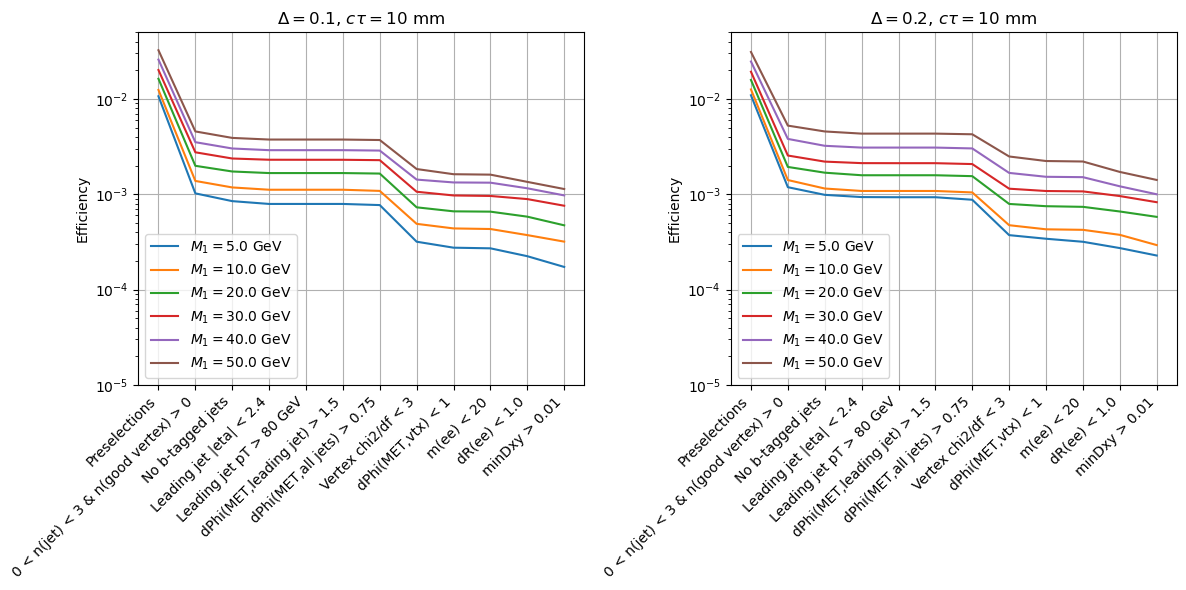

In [33]:
deltas = [0.1,0.2]

ct = 10

fig,axes = plt.subplots(1,len(deltas),figsize=(6*len(deltas),6))

for i, delta in enumerate(deltas):
    plt.sca(axes[i])
    plot_efficiency_signal_varying_M1( df_sig = si, dict_eff = cf_s, cuts = cuts, cutNames = cutNames, 
                                       delta = delta, ct = ct)
plt.tight_layout()
plt.show()

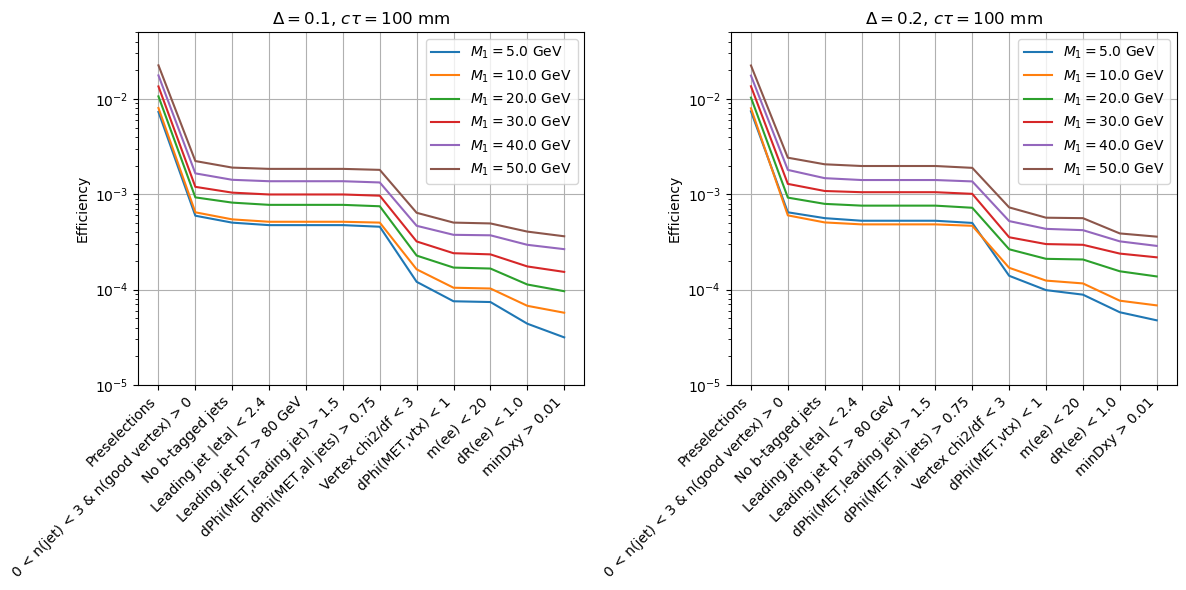

In [34]:
deltas = [0.1,0.2]

ct = 100

fig,axes = plt.subplots(1,len(deltas),figsize=(6*len(deltas),6))

for i, delta in enumerate(deltas):
    plt.sca(axes[i])
    plot_efficiency_signal_varying_M1( df_sig = si, dict_eff = cf_s, cuts = cuts, cutNames = cutNames, 
                                       delta = delta, ct = ct)
plt.tight_layout()
plt.show()

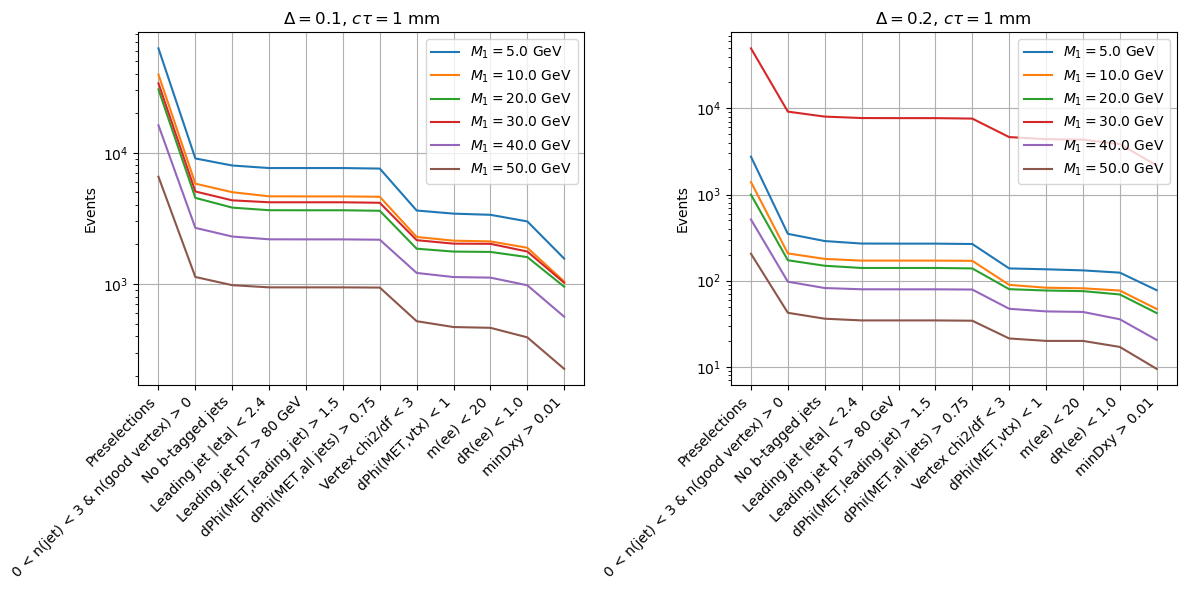

In [95]:
deltas = [0.1,0.2]

ct = 1

fig,axes = plt.subplots(1,len(deltas),figsize=(6*len(deltas),6))

for i, delta in enumerate(deltas):
    plt.sca(axes[i])
    plot_counts_signal_varying_M1( df_sig = si, dict_eff = ct_s, cuts = cuts, cutNames = cutNames, 
                                       delta = delta, ct = ct, ylabel='Events')
plt.tight_layout()
plt.show()

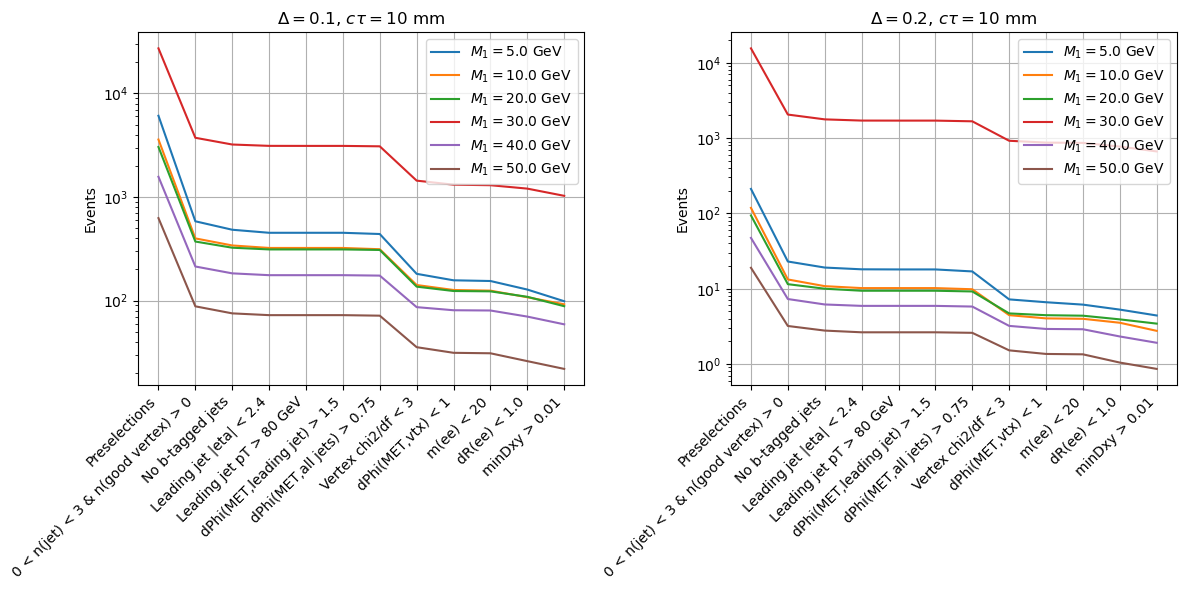

In [96]:
deltas = [0.1,0.2]

ct = 10

fig,axes = plt.subplots(1,len(deltas),figsize=(6*len(deltas),6))

for i, delta in enumerate(deltas):
    plt.sca(axes[i])
    plot_counts_signal_varying_M1( df_sig = si, dict_eff = ct_s, cuts = cuts, cutNames = cutNames, 
                                       delta = delta, ct = ct, ylabel='Events')
plt.tight_layout()
plt.show()

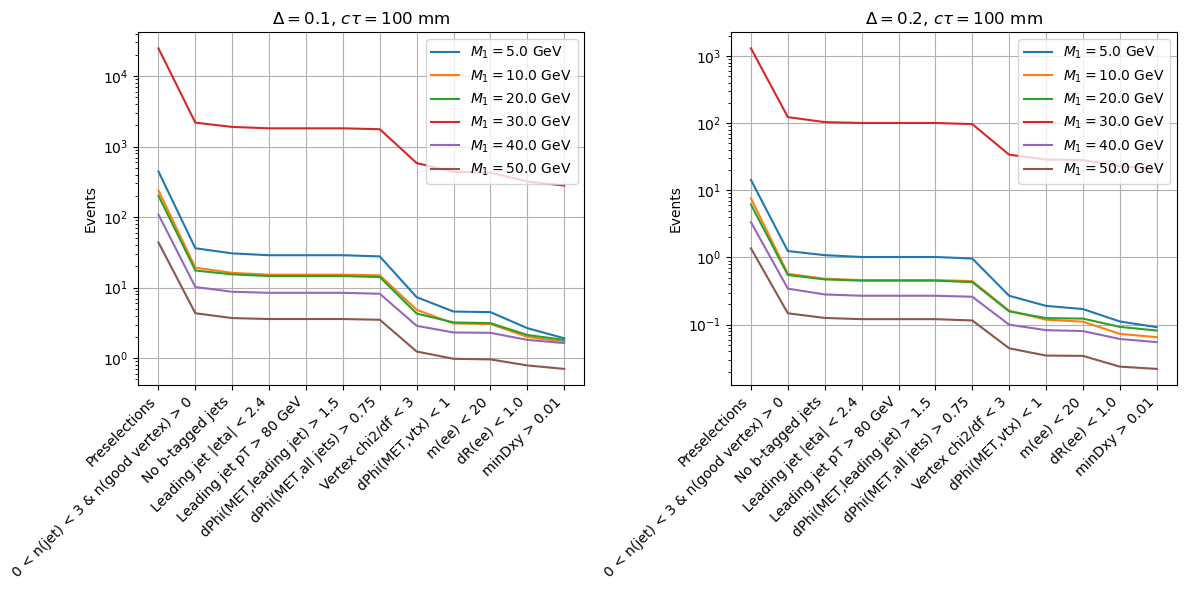

In [97]:
deltas = [0.1,0.2]

ct = 100

fig,axes = plt.subplots(1,len(deltas),figsize=(6*len(deltas),6))

for i, delta in enumerate(deltas):
    plt.sca(axes[i])
    plot_counts_signal_varying_M1( df_sig = si, dict_eff = ct_s, cuts = cuts, cutNames = cutNames, 
                                       delta = delta, ct = ct, ylabel='Events')
plt.tight_layout()
plt.show()

### Cutflow Dataframe -- background

In [35]:
cuts = list(bkg_histos['W+jets']['cutflow']['bkg_2018_WJetsLNu_HT2500toInf'])

In [36]:
tot_bkg_cts = {} 
tot_bkg_effs = {} 
total_bkg_counts = {} 

In [37]:
for b in bkg_histos.keys():
    
    total_bkg_counts[b] = 0
    for k in bkg_histos[b]['cutflow'].keys():
        total_bkg_counts[b] += bkg_histos[b]['cutflow_cts'][k]['all'] / bkg_histos[b]['cutflow'][k]['all']

In [38]:
for b in bkg_histos.keys():
    cfd = bkg_histos[b]['cutflow_cts']
    effd = bkg_histos[b]['cutflow']

    cts_dict = {k:0 for k in cuts}
    
    for k in cfd.keys():
        for c in cuts:
            cts_dict[c] += cfd[k][c]

    tot_bkg_cts[b] = cts_dict # subprocess summed
    tot_bkg_effs[b] = {c:cts_dict[c]/total_bkg_counts[b] for c in cuts}

In [39]:
bkg_summed_cts = {c:sum([tot_bkg_cts[b][c] for b in tot_bkg_cts.keys()]) for c in cuts}

In [40]:
bkg_summed_eff = {c: bkg_summed_cts[c] / sum(total_bkg_counts.values()) for c in cuts}

In [41]:
bkg_columns = list(bkg_histos.keys())
bkg_columns.append('total')

tot_bkg_effs['total'] = bkg_summed_eff
tot_bkg_cts['total'] = bkg_summed_cts

In [42]:
bkg_efficiency = {c: [ tot_bkg_effs[samp][c] for samp in bkg_columns ] for c in cuts}
bkg_counts = {c: [ tot_bkg_cts[samp][c] for samp in bkg_columns ] for c in cuts}

In [43]:
bkg_eff_df = pd.DataFrame.from_dict(bkg_efficiency).transpose()
bkg_eff_df.columns = bkg_columns

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))

bkg_eff_df.index = cut

In [44]:
bkg_eff_df

,QCD,Top,DY,Diboson,Triboson,W+jets,Z+jets,total
Preselections,1.765167e-06,1.294682e-04,1.126054e-05,6.373026e-04,0.001933,2.309964e-03,0.006645,1.878092e-05
0 < n(jet) < 3 & n(good vertex) > 0,8.736155e-08,1.277478e-05,5.215843e-07,4.435487e-05,0.000158,1.729308e-04,0.000398,1.258685e-06
No b-tagged jets,6.157029e-08,7.989828e-06,4.841556e-07,3.273392e-05,0.000104,1.387287e-04,0.000325,1.005441e-06
Leading jet |eta| < 2.4,6.120635e-08,7.173793e-06,4.841556e-07,3.073427e-05,0.000092,1.315265e-04,0.000310,9.577009e-07
Leading jet pT > 80 GeV,6.120635e-08,7.149992e-06,4.841556e-07,3.043376e-05,0.000091,1.312650e-04,0.000309,9.559090e-07
"dPhi(MET,leading jet) > 1.5",6.117856e-08,7.149145e-06,4.841556e-07,3.029834e-05,0.000091,1.312209e-04,0.000309,9.556166e-07
"dPhi(MET,all jets) > 0.75",2.933839e-08,6.716169e-06,3.539610e-07,2.727575e-05,0.000076,1.139098e-04,0.000292,8.272960e-07
Vertex chi2/df < 3,0.000000e+00,2.021315e-06,1.114804e-07,7.126620e-06,0.000034,2.664100e-05,0.000065,1.863389e-07
"dPhi(MET,vtx) < 1",0.000000e+00,7.503584e-07,1.114804e-07,2.994301e-06,0.000017,1.081929e-05,0.000019,7.264455e-08
m(ee) < 20,0.000000e+00,6.309091e-07,1.114804e-07,2.239580e-06,0.000011,8.888462e-06,0.000019,6.355333e-08


In [45]:
bkg_cts_df = pd.DataFrame.from_dict(bkg_counts).transpose()
bkg_cts_df.columns = bkg_columns

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))

bkg_cts_df.index = cut

In [46]:
bkg_cts_df

,QCD,Top,DY,Diboson,Triboson,W+jets,Z+jets,total
Preselections,38039.826987,5667.491120,14495.724273,4424.202428,52.996922,227212.601036,142220.153499,432112.996264
0 < n(jet) < 3 & n(good vertex) > 0,1882.665324,559.218223,671.436619,307.914836,4.324318,17009.814573,8524.545695,28959.919588
No b-tagged jets,1326.856559,349.755962,623.254666,227.241343,2.854129,13645.628528,6957.674053,23133.265240
Leading jet |eta| < 2.4,1319.013605,314.033934,623.254666,213.359570,2.510261,12937.207075,6625.483327,22034.862439
Leading jet pT > 80 GeV,1319.013605,312.992040,623.254666,211.273431,2.506022,12911.488177,6613.106470,21993.634411
"dPhi(MET,leading jet) > 1.5",1318.414646,312.954947,623.254666,210.333328,2.501784,12907.145737,6612.301368,21986.906477
"dPhi(MET,all jets) > 0.75",632.250399,294.001347,455.654738,189.350279,2.086892,11204.390252,6256.761468,19034.495374
Vertex chi2/df < 3,0.000000,88.483387,143.508952,49.473533,0.920674,2620.462072,1384.452918,4287.301536
"dPhi(MET,vtx) < 1",0.000000,32.847057,143.508952,20.786660,0.457630,1064.206556,409.604970,1671.411824
m(ee) < 20,0.000000,27.618146,143.508952,15.547329,0.294637,874.286747,400.984559,1462.240370


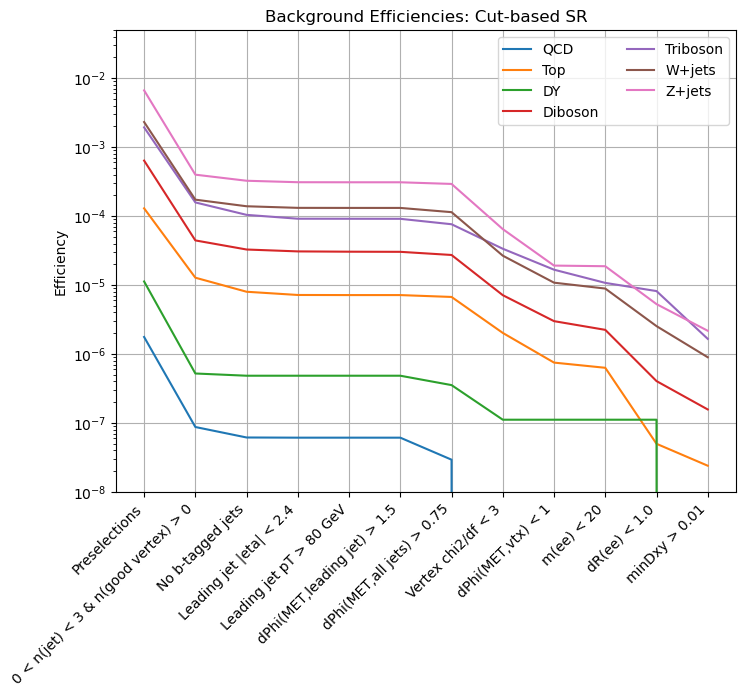

In [47]:
# bkg efficiencies summed over sub-samples

plt.figure(figsize=(8,6))
plt.title(r"Background Efficiencies: Cut-based SR")

for b in bkg_histos.keys():
    cfbs = tot_bkg_effs[b]
    effs = [cfbs[c] for c in cuts]
    plt.plot(np.arange(len(effs)),effs,label=b)
    #plt.ylim([1e-12,1])

plt.yscale('log')
plt.ylabel("Efficiency")
plt.legend(loc='upper right',ncol=2)
plt.grid()

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cut, rotation = 45, ha = 'right')

plt.ylim([1e-8, 5e-2])
plt.show()

#os.makedirs("plots/cutflows/")

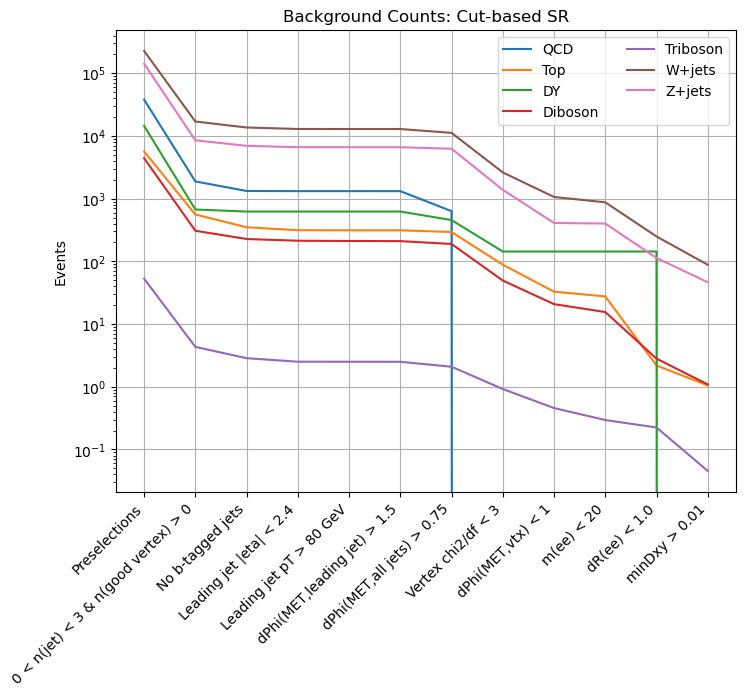

In [92]:
# bkg efficiencies summed over sub-samples

plt.figure(figsize=(8,6))
plt.title(r"Background Counts: Cut-based SR")

for b in bkg_histos.keys():
    cfbs = tot_bkg_cts[b]
    effs = [cfbs[c] for c in cuts]
    plt.plot(np.arange(len(effs)),effs,label=b)
    #plt.ylim([1e-12,1])

plt.yscale('log')
plt.ylabel("Events")
plt.legend(loc='upper right',ncol=2)
plt.grid()

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cut, rotation = 45, ha = 'right')

#plt.ylim([1e-8, 5e-2])
plt.show()

#os.makedirs("plots/cutflows/")
#plt.savefig(f"plots/bkg_BDT-ctau1_combined_efficiencies.png")

### Event Yield

In [48]:
sqrtB = np.sqrt(bkg_cts_df.iloc[-1].loc['total'])

print('Total background after last SR cut: {:.2f}'.format(bkg_cts_df['total'].iloc[-1]))
print('sqrt(B) = {:.2f}'.format(sqrtB))

Total background after last SR cut: 136.87
sqrt(B) = 11.70


In [49]:
s_df = sig_cts_df.iloc[-1]
s_match_df = sig_match_df.iloc[-1]

# when only looking at the events where gen ee are reconstructed (dR(gen,reco)<0.1)
s_reco_df = sig_cts_reco_df.iloc[-1]
s_match_reco_df = sig_match_reco_df.iloc[-1]

In [50]:
columns_ctau = {'1': {'0p1': [], '0p2': []}, '10': {'0p1': [], '0p2': []}, '100': {'0p1': [], '0p2': []}}

for name in sig_columns:
    
    mchi = ptools.signalPoint(name)['mchi']
    dmchi = ptools.signalPoint(name)['dmchi']
    delta = ptools.signalPoint(name)['delta']

    if 'ctau-10' not in name:
        if delta == 0.1:
            columns_ctau['1']['0p1'].append(name)
        elif delta == 0.2:
            columns_ctau['1']['0p2'].append(name)
    elif 'ctau-100' not in name:
        if delta == 0.1:
            columns_ctau['10']['0p1'].append(name)
        elif delta == 0.2:
            columns_ctau['10']['0p2'].append(name)
    else:
        if delta == 0.1:
            columns_ctau['100']['0p1'].append(name)
        elif delta == 0.2:
            columns_ctau['100']['0p2'].append(name)

ct = '10'
delta = '0p1'
print(columns_ctau[ct][delta])

['sig_2018_Mchi-5p25_dMchi-0p5_ctau-10', 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-10', 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-10', 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-10', 'sig_2018_Mchi-21p0_dMchi-2p0_ctau-10', 'sig_2018_Mchi-10p5_dMchi-1p0_ctau-10']


In [51]:
deltas = ['0p1','0p2']
ctaus = ['1','10','100']

for delta in deltas:
    for ctau in ctaus:
        signal_df[delta][ctau] = s_df.loc[columns_ctau[ctau][delta]].to_frame()[::-1].transpose()
        signal_df[delta][ctau].rename(index = {signal_df[delta][ctau].index[0]: f"{ctau}mm"}, inplace = True)

        signal_match_df[delta][ctau] = s_match_df.loc[columns_ctau[ctau][delta]].to_frame()[::-1].transpose()
        signal_match_df[delta][ctau].rename(index = {signal_match_df[delta][ctau].index[0]: f"{ctau}mm"}, inplace = True)

In [52]:
print('Signal yield for delta = 0.1, ctau = 100')
signal_df['0p1']['100'].transpose()

Signal yield for delta = 0.1, ctau = 100


,100mm
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,1.698284
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,1.814260
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100,279.874625
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100,1.636510
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,0.704473
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,1.915579


In [53]:
print('Signal yield for delta = 0.1, ctau = 100')
signal_df['0p1']['100'].transpose()

Signal yield for delta = 0.1, ctau = 100


,100mm
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,1.698284
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,1.814260
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100,279.874625
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100,1.636510
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,0.704473
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,1.915579


In [54]:
print('Signal yield for delta = 0.1, ctau = 10')
signal_df['0p1']['10'].transpose()

Signal yield for delta = 0.1, ctau = 10


,10mm
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,92.058292
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,88.299365
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10,1027.220010
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10,59.021743
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,21.907839
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,98.624084


In [55]:
print('Signal yield for delta = 0.1, ctau = 1')
signal_df['0p1']['1'].transpose()

Signal yield for delta = 0.1, ctau = 1


,1mm
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,1045.093443
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,953.420070
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1,1021.596297
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1,563.117188
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,225.551710
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,1560.499063


In [56]:
print('Signal yield for delta = 0.2, ctau = 100')
signal_df['0p2']['100'].transpose()

Signal yield for delta = 0.2, ctau = 100


,100mm
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,0.065078
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100,0.081691
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100,20.917916
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100,0.054833
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,0.021906
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,0.091763


In [57]:
print('Signal yield for delta = 0.2, ctau = 10')
signal_df['0p2']['10'].transpose()

Signal yield for delta = 0.2, ctau = 10


,10mm
sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,2.758048
sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,3.439587
sig_2018_Mchi-33p0_dMchi-6p0_ctau-10,665.416315
sig_2018_Mchi-44p0_dMchi-8p0_ctau-10,1.914811
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,0.861369
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,4.411324


In [58]:
print('Signal yield for delta = 0.2, ctau = 1')
signal_df['0p2']['1'].transpose()

Signal yield for delta = 0.2, ctau = 1


,1mm
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,46.941527
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1,42.068789
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1,2172.470162
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1,20.507454
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,9.454258
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,77.445435


In [59]:
print('Vertex purity for delta = 0.1, ctau = 10')
signal_match_df['0p1']['10'].transpose()

Vertex purity for delta = 0.1, ctau = 10


,10mm
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,0.941461
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,0.947001
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10,0.969332
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10,0.976851
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,0.970325
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,0.901141


In [60]:
deltas = ['0p1','0p2']
ctaus = ['1','10','100']

for delta in deltas:
    for ctau in ctaus:
        signal_reco_df[delta][ctau] = s_reco_df.loc[columns_ctau[ctau][delta]].to_frame()[::-1].transpose()
        signal_reco_df[delta][ctau].rename(index = {signal_reco_df[delta][ctau].index[0]: f"{ctau}mm"}, inplace = True)

        signal_match_reco_df[delta][ctau] = s_match_reco_df.loc[columns_ctau[ctau][delta]].to_frame()[::-1].transpose()
        signal_match_reco_df[delta][ctau].rename(index = {signal_match_reco_df[delta][ctau].index[0]: f"{ctau}mm"}, inplace = True)

In [61]:
print('Signal yield when only looking at events where gen ee are reconstructed; for delta = 0.1, ctau = 100')
signal_reco_df['0p1']['100'].transpose()

Signal yield when only looking at events where gen ee are reconstructed; for delta = 0.1, ctau = 100


,100mm
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,1.505316
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,1.740648
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100,255.876818
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100,1.582897
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,0.673516
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,1.790966


In [62]:
print('Vertex purity when only looking at events where gen ee are reconstructed; for delta = 0.1, ctau = 10')
signal_match_reco_df['0p1']['10'].transpose()

Vertex purity when only looking at events where gen ee are reconstructed; for delta = 0.1, ctau = 10


,10mm
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,0.960173
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,0.972844
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10,0.989568
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10,0.992161
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,0.984957
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,0.948061


## Signal Yield after the last cut in SR

In [63]:
delta = '0p1'

for idx, ctau in enumerate(ctaus):
    m1s = [int(ptools.signalPoint(i)['m1']) for i in signal_df[delta][ctau].columns]
    signal_df[delta][ctau].columns = m1s

    signal_df[delta][ctau] = signal_df[delta][ctau].sort_index(axis=1)

frames = [signal_df[delta]['1'], signal_df[delta]['10'], signal_df[delta]['100']]
delta_0p1_df = pd.concat(frames)

In [64]:
print('delta = 0p1, signal yield after last cut in SR')
delta_0p1_df

delta = 0p1, signal yield after last cut in SR


,5,10,20,30,40,50
1mm,1560.499063,1045.093443,953.420070,1021.596297,563.117188,225.551710
10mm,98.624084,92.058292,88.299365,1027.220010,59.021743,21.907839
100mm,1.915579,1.698284,1.814260,279.874625,1.636510,0.704473


In [65]:
for idx, ctau in enumerate(ctaus):
    m1s = [int(ptools.signalPoint(i)['m1']) for i in signal_reco_df[delta][ctau].columns]
    signal_reco_df[delta][ctau].columns = m1s

    signal_reco_df[delta][ctau] = signal_reco_df[delta][ctau].sort_index(axis=1)

frames = [signal_reco_df[delta]['1'], signal_reco_df[delta]['10'], signal_reco_df[delta]['100']]
delta_0p1_reco_df = pd.concat(frames)

In [66]:
print('delta = 0p1, signal yield for events where gen ee are reconstructed, after last cut in SR')
delta_0p1_reco_df

delta = 0p1, signal yield for events where gen ee are reconstructed, after last cut in SR


,5,10,20,30,40,50
1mm,1560.499063,1018.462991,953.420070,1011.525021,553.560956,221.954531
10mm,93.743133,90.264211,85.953791,1006.214095,58.111028,21.582381
100mm,1.790966,1.505316,1.740648,255.876818,1.582897,0.673516


In [67]:
delta = '0p2'

for idx, ctau in enumerate(ctaus):
    m1s = [int(ptools.signalPoint(i)['m1']) for i in signal_df[delta][ctau].columns]
    signal_df[delta][ctau].columns = m1s

    signal_df[delta][ctau] = signal_df[delta][ctau].sort_index(axis=1)

frames = [signal_df[delta]['1'], signal_df[delta]['10'], signal_df[delta]['100']]
delta_0p2_df = pd.concat(frames)

In [68]:
print('delta = 0p2, signal yield after last cut in SR')
delta_0p2_df

delta = 0p2, signal yield after last cut in SR


,5,10,20,30,40,50
1mm,77.445435,46.941527,42.068789,2172.470162,20.507454,9.454258
10mm,4.411324,2.758048,3.439587,665.416315,1.914811,0.861369
100mm,0.091763,0.065078,0.081691,20.917916,0.054833,0.021906


In [69]:
delta = '0p2'

for idx, ctau in enumerate(ctaus):
    m1s = [int(ptools.signalPoint(i)['m1']) for i in signal_reco_df[delta][ctau].columns]
    signal_reco_df[delta][ctau].columns = m1s

    signal_reco_df[delta][ctau] = signal_reco_df[delta][ctau].sort_index(axis=1)

frames = [signal_reco_df[delta]['1'], signal_reco_df[delta]['10'], signal_reco_df[delta]['100']]
delta_0p2_reco_df = pd.concat(frames)

In [70]:
print('delta = 0p2, signal yield for events where gen ee are reconstructed, after last cut in SR')
delta_0p2_reco_df

delta = 0p2, signal yield for events where gen ee are reconstructed, after last cut in SR


,5,10,20,30,40,50
1mm,76.154700,46.515300,41.788799,2154.627089,20.131550,9.183680
10mm,4.277519,2.690829,3.348818,655.405160,1.888743,0.856126
100mm,0.072162,0.055950,0.074812,19.686378,0.051032,0.021318


In [99]:
sqrtB**2

136.87341354070205

## Display S/B

In [71]:
pd.set_option("display.precision", 3)

In [72]:
delta = '0p1'

frames = [delta_0p1_df.iloc[0].to_frame().transpose()/sqrtB, \
          delta_0p1_df.iloc[1].to_frame().transpose()/sqrtB, \
          delta_0p1_df.iloc[2].to_frame().transpose()/sqrtB]

delta_0p1_SoverB_df = pd.concat(frames)

delta_0p1_SoverB_df = delta_0p1_SoverB_df.sort_index(axis=1)

In [73]:
print('delta = 0.1, S/sqrt(B)')

delta_0p1_SoverB_df.columns = [f'{m1} GeV' for m1 in sorted(m1s)]

delta_0p1_SoverB_df

delta = 0.1, S/sqrt(B)


,5 GeV,10 GeV,20 GeV,30 GeV,40 GeV,50 GeV
1mm,133.384,89.330,81.494,87.321,48.133,19.279
10mm,8.430,7.869,7.547,87.802,5.045,1.873
100mm,0.164,0.145,0.155,23.922,0.140,0.060


In [74]:
delta = '0p1'

frames = [delta_0p1_reco_df.iloc[0].to_frame().transpose()/sqrtB, \
          delta_0p1_reco_df.iloc[1].to_frame().transpose()/sqrtB, \
          delta_0p1_reco_df.iloc[2].to_frame().transpose()/sqrtB]

delta_0p1_SoverB_reco_df = pd.concat(frames)

delta_0p1_SoverB_reco_df = delta_0p1_SoverB_reco_df.sort_index(axis=1)

print('delta = 0.1, S/sqrt(B), only counting the signal events where gen ee are reconstructed')

delta_0p1_SoverB_reco_df.columns = [f'{m1} GeV' for m1 in sorted(m1s)]

delta_0p1_SoverB_reco_df

delta = 0.1, S/sqrt(B), only counting the signal events where gen ee are reconstructed


,5 GeV,10 GeV,20 GeV,30 GeV,40 GeV,50 GeV
1mm,133.384,87.053,81.494,86.460,47.316,18.972
10mm,8.013,7.715,7.347,86.006,4.967,1.845
100mm,0.153,0.129,0.149,21.871,0.135,0.058


In [75]:
delta = '0p2'

frames = [delta_0p2_df.iloc[0].to_frame().transpose()/sqrtB, \
          delta_0p2_df.iloc[1].to_frame().transpose()/sqrtB, \
          delta_0p2_df.iloc[2].to_frame().transpose()/sqrtB]

delta_0p2_SoverB_df = pd.concat(frames)

delta_0p2_SoverB_df = delta_0p2_SoverB_df.sort_index(axis=1)

In [76]:
print('delta = 0.2, S/sqrt(B)')

delta_0p2_SoverB_df.columns = [f'{m1} GeV' for m1 in sorted(m1s)]

delta_0p2_SoverB_df

delta = 0.2, S/sqrt(B)


,5 GeV,10 GeV,20 GeV,30 GeV,40 GeV,50 GeV
1mm,6.620,4.012,3.596,185.692,1.753,0.808
10mm,0.377,0.236,0.294,56.877,0.164,0.074
100mm,0.008,0.006,0.007,1.788,0.005,0.002


In [77]:
delta = '0p2'

frames = [delta_0p2_reco_df.iloc[0].to_frame().transpose()/sqrtB, \
          delta_0p2_reco_df.iloc[1].to_frame().transpose()/sqrtB, \
          delta_0p2_reco_df.iloc[2].to_frame().transpose()/sqrtB]

delta_0p2_SoverB_reco_df = pd.concat(frames)

delta_0p2_SoverB_reco_df = delta_0p2_SoverB_reco_df.sort_index(axis=1)

print('delta = 0.2, S/sqrt(B), only counting the signal events where gen ee are reconstructed')

delta_0p2_SoverB_reco_df.columns = [f'{m1} GeV' for m1 in sorted(m1s)]

delta_0p2_SoverB_reco_df

delta = 0.2, S/sqrt(B), only counting the signal events where gen ee are reconstructed


,5 GeV,10 GeV,20 GeV,30 GeV,40 GeV,50 GeV
1mm,6.509,3.976,3.572,184.167,1.721,0.785
10mm,0.366,0.230,0.286,56.021,0.161,0.073
100mm,0.006,0.005,0.006,1.683,0.004,0.002


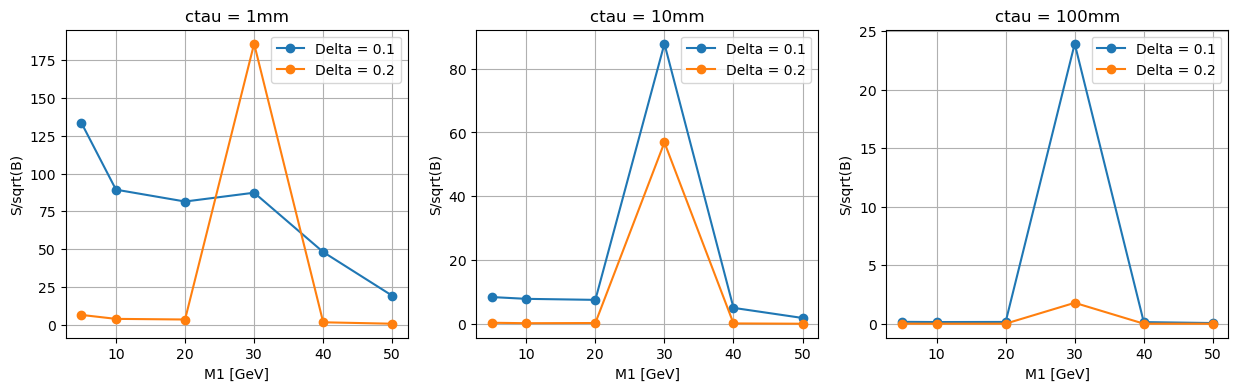

In [78]:
f, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, ctau in enumerate(ctaus):
    ctau = int(ctau)
    
    y_arr_1 = delta_0p1_SoverB_df.iloc[idx].to_list()
    y_arr_2 = delta_0p2_SoverB_df.iloc[idx].to_list()

    x_arr = sorted(m1s)
    
    axes[idx].plot(x_arr, y_arr_1, '-o', label=f'Delta = 0.1')
    axes[idx].plot(x_arr, y_arr_2, '-o', label=f'Delta = 0.2')

    axes[idx].legend()
    
    axes[idx].set_xlabel('M1 [GeV]')
    axes[idx].set_ylabel('S/sqrt(B)')
    
    axes[idx].grid()
    
    axes[idx].set_title(f'ctau = {ctau}mm')

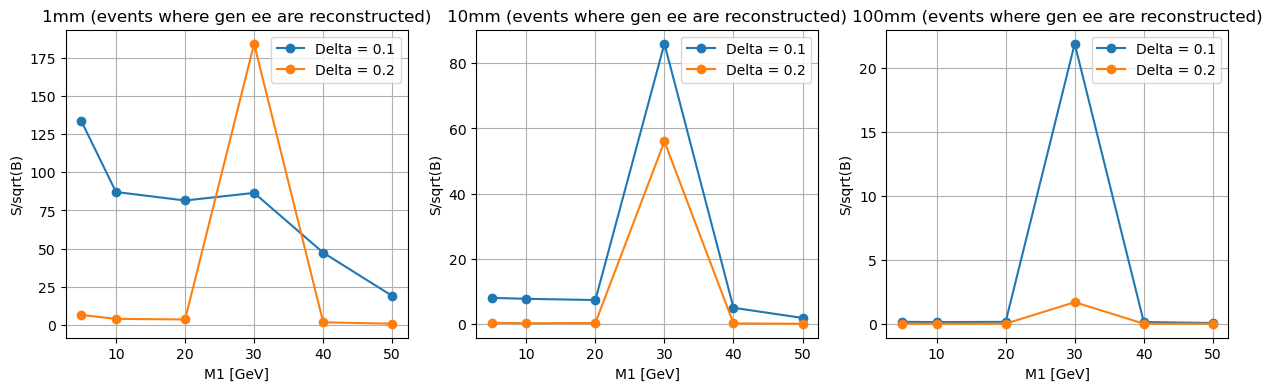

In [79]:
f, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, ctau in enumerate(ctaus):
    ctau = int(ctau)
    
    y_arr_1 = delta_0p1_SoverB_reco_df.iloc[idx].to_list()
    y_arr_2 = delta_0p2_SoverB_reco_df.iloc[idx].to_list()

    x_arr = sorted(m1s)
    
    axes[idx].plot(x_arr, y_arr_1, '-o', label=f'Delta = 0.1')
    axes[idx].plot(x_arr, y_arr_2, '-o', label=f'Delta = 0.2')

    axes[idx].legend()
    
    axes[idx].set_xlabel('M1 [GeV]')
    axes[idx].set_ylabel('S/sqrt(B)')
    
    axes[idx].grid()
    
    axes[idx].set_title(f'{ctau}mm (events where gen ee are reconstructed)')

## Vertex purity

In [80]:
delta = '0p1'

for idx, ctau in enumerate(ctaus):
    m1s = [int(ptools.signalPoint(i)['m1']) for i in signal_match_df[delta][ctau].columns]
    signal_match_df[delta][ctau].columns = m1s

    signal_match_df[delta][ctau] = signal_match_df[delta][ctau].sort_index(axis=1)

frames = [signal_match_df[delta]['1'], signal_match_df[delta]['10'], signal_match_df[delta]['100']]
delta_0p1_match_df = pd.concat(frames)

In [81]:
print('Cut-based SR')
print('delta = 0.1, vertex purity = [nEvents(best vertex matches the true vertex)] / [nEvents(all)]')

delta_0p1_match_df.columns = [f'{m1} GeV' for m1 in sorted(m1s)]

delta_0p1_match_df

Cut-based SR
delta = 0.1, vertex purity = [nEvents(best vertex matches the true vertex)] / [nEvents(all)]


,5 GeV,10 GeV,20 GeV,30 GeV,40 GeV,50 GeV
1mm,0.966,0.934,0.967,0.961,0.949,0.956
10mm,0.901,0.941,0.947,0.969,0.977,0.970
100mm,0.870,0.864,0.932,0.877,0.955,0.916


In [82]:
for idx, ctau in enumerate(ctaus):
    m1s = [int(ptools.signalPoint(i)['m1']) for i in signal_match_reco_df[delta][ctau].columns]
    signal_match_reco_df[delta][ctau].columns = m1s

    signal_match_reco_df[delta][ctau] = signal_match_reco_df[delta][ctau].sort_index(axis=1)

frames = [signal_match_reco_df[delta]['1'], signal_match_reco_df[delta]['10'], signal_match_reco_df[delta]['100']]
delta_0p1_match_reco_df = pd.concat(frames)

In [83]:
print('Cut-based SR')
print('delta = 0.1, vertex purity = [nEvents(best vertex matches the true vertex)] / [nEvents(having gen ee reconstructed)]')
delta_0p1_match_reco_df.columns = [f'{m1} GeV' for m1 in sorted(m1s)]

delta_0p1_match_reco_df

Cut-based SR
delta = 0.1, vertex purity = [nEvents(best vertex matches the true vertex)] / [nEvents(having gen ee reconstructed)]


,5 GeV,10 GeV,20 GeV,30 GeV,40 GeV,50 GeV
1mm,0.966,0.958,0.967,0.97,0.965,0.972
10mm,0.948,0.960,0.973,0.99,0.992,0.985
100mm,0.930,0.974,0.972,0.96,0.987,0.958


In [84]:
delta = '0p2'

for idx, ctau in enumerate(ctaus):
    m1s = [int(ptools.signalPoint(i)['m1']) for i in signal_match_df[delta][ctau].columns]
    signal_match_df[delta][ctau].columns = m1s

    signal_match_df[delta][ctau] = signal_match_df[delta][ctau].sort_index(axis=1)

frames = [signal_match_df[delta]['1'], signal_match_df[delta]['10'], signal_match_df[delta]['100']]
delta_0p2_match_df = pd.concat(frames)

In [85]:
print('Cut-based SR')
print('delta = 0.2, vertex purity = [nEvents(best vertex matches the true vertex)] / [nEvents(all)]')

delta_0p2_match_df.columns = [f'{m1} GeV' for m1 in sorted(m1s)]

delta_0p2_match_df

Cut-based SR
delta = 0.2, vertex purity = [nEvents(best vertex matches the true vertex)] / [nEvents(all)]


,5 GeV,10 GeV,20 GeV,30 GeV,40 GeV,50 GeV
1mm,0.975,0.959,0.953,0.978,0.954,0.943
10mm,0.909,0.945,0.954,0.967,0.962,0.976
100mm,0.786,0.820,0.904,0.894,0.925,0.946


In [86]:
for idx, ctau in enumerate(ctaus):
    m1s = [int(ptools.signalPoint(i)['m1']) for i in signal_match_reco_df[delta][ctau].columns]
    signal_match_reco_df[delta][ctau].columns = m1s

    signal_match_reco_df[delta][ctau] = signal_match_reco_df[delta][ctau].sort_index(axis=1)

frames = [signal_match_reco_df[delta]['1'], signal_match_reco_df[delta]['10'], signal_match_reco_df[delta]['100']]
delta_0p2_match_reco_df = pd.concat(frames)

In [87]:
print('Cut-based SR')
print('delta = 0.2, vertex purity = [nEvents(best vertex matches the true vertex)] / [nEvents(having gen ee reconstructed)]')
delta_0p2_match_reco_df.columns = [f'{m1} GeV' for m1 in sorted(m1s)]

delta_0p2_match_reco_df

Cut-based SR
delta = 0.2, vertex purity = [nEvents(best vertex matches the true vertex)] / [nEvents(having gen ee reconstructed)]


,5 GeV,10 GeV,20 GeV,30 GeV,40 GeV,50 GeV
1mm,0.992,0.968,0.960,0.986,0.972,0.971
10mm,0.938,0.969,0.980,0.982,0.975,0.982
100mm,1.000,0.954,0.987,0.950,0.994,0.972


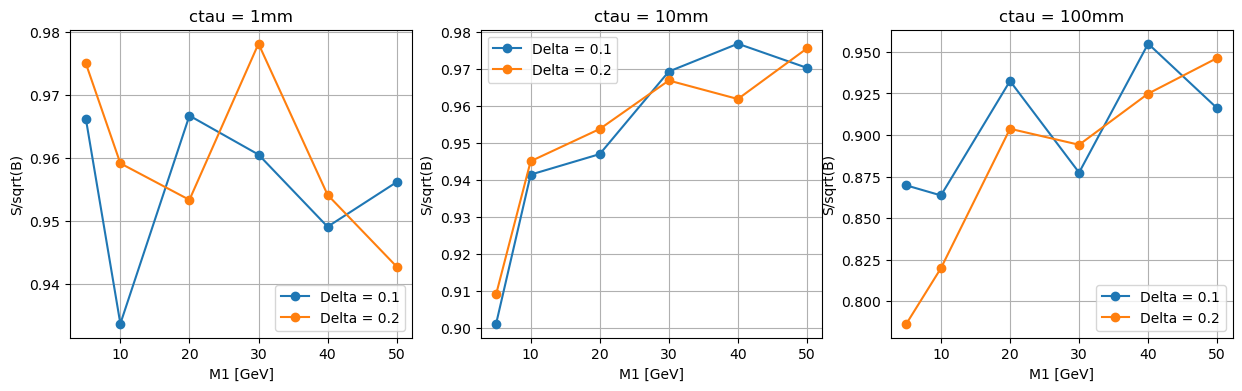

In [88]:
f, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, ctau in enumerate(ctaus):
    ctau = int(ctau)
    
    y_arr_1 = delta_0p1_match_df.iloc[idx].to_list()
    y_arr_2 = delta_0p2_match_df.iloc[idx].to_list()

    x_arr = sorted(m1s)
    
    axes[idx].plot(x_arr, y_arr_1, '-o', label=f'Delta = 0.1')
    axes[idx].plot(x_arr, y_arr_2, '-o', label=f'Delta = 0.2')

    axes[idx].legend()
    
    axes[idx].set_xlabel('M1 [GeV]')
    axes[idx].set_ylabel('S/sqrt(B)')
    
    axes[idx].grid()
    
    axes[idx].set_title(f'ctau = {ctau}mm')

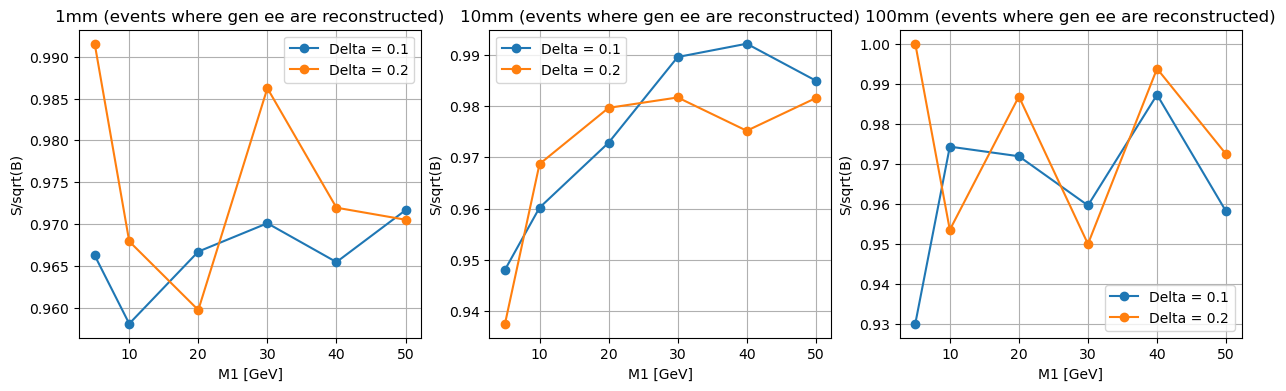

In [89]:
f, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, ctau in enumerate(ctaus):
    ctau = int(ctau)
    
    y_arr_1 = delta_0p1_match_reco_df.iloc[idx].to_list()
    y_arr_2 = delta_0p2_match_reco_df.iloc[idx].to_list()

    x_arr = sorted(m1s)
    
    axes[idx].plot(x_arr, y_arr_1, '-o', label=f'Delta = 0.1')
    axes[idx].plot(x_arr, y_arr_2, '-o', label=f'Delta = 0.2')

    axes[idx].legend()
    
    axes[idx].set_xlabel('M1 [GeV]')
    axes[idx].set_ylabel('S/sqrt(B)')
    
    axes[idx].grid()
    
    axes[idx].set_title(f'{ctau}mm (events where gen ee are reconstructed)')

In [90]:
# export
delta_0p1_SoverB_df.to_csv('../SR_BDT-based_BugFix/Cut-based-SR_SoverB_delta_0p1.csv')
delta_0p2_SoverB_df.to_csv('../SR_BDT-based_BugFix/Cut-based-SR_SoverB_delta_0p2.csv') 

# export
delta_0p1_SoverB_reco_df.to_csv('../SR_BDT-based_BugFix/Cut-based-SR_SoverB_delta_0p1_hasGenEEreconstructed.csv')
delta_0p2_SoverB_reco_df.to_csv('../SR_BDT-based_BugFix/Cut-based-SR_SoverB_delta_0p2_hasGenEEreconstructed.csv') 

In [91]:
# export
delta_0p1_match_df.to_csv('../SR_BDT-based_BugFix/Cut-based-SR_Purity_delta_0p1.csv') 
delta_0p2_match_df.to_csv('../SR_BDT-based_BugFix/Cut-based-SR_Purity_delta_0p2.csv') 

delta_0p1_match_reco_df.to_csv('../SR_BDT-based_BugFix/Cut-based-SR_Purity_delta_0p1_hasGenEEreconstructed.csv') 
delta_0p2_match_reco_df.to_csv('../SR_BDT-based_BugFix/Cut-based-SR_Purity_delta_0p2_hasGenEEreconstructed.csv') 